<a href="https://colab.research.google.com/github/Kimjihee05/mining/blob/main/%EA%B1%B4%EA%B0%95%EA%B2%80%EC%A7%84_%EB%B6%84%EB%A5%98_%EB%AA%A8%EB%8D%B8_%ED%8F%89%EA%B0%80%EA%B3%BC%EC%A0%9C_%EA%B9%80%EC%A7%80%ED%9D%AC_2015352.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2020년도 건강검진정보 샘플(1만건) 데이터를 이용히야 최적의 분류 모델을 만들고 평가 결과 및 도출된 인사이트를 보여주시오. 
(1) 흥미로운 분류 문제 선정: 종속/독립 변수 선택 
   - 수치 데이터를 범주형으로 변경 가능 (예. 이진 클래스로 변경: 0.5 이상 Y, 0.5 미만 N)
   - 건강검진 데이터에 다른 외부 데이터를 연결해서 이용도 가능
   - 필요한 경우 데이터 전처리 및 파생변수 생성 
(2) 최적의 분류 모델 선택 (분류 기법, 파라미터) 및 평가 결과 
   - 적절한 평가 방법 1개 선택 
   - 분류 모델의 종류는 3개 이하로 선택, 수업시간에 배우지 않은 분류 모델도 사용 가능 
(3) 분류 모델을 통한 인사이트 도출:  중요 변수 설명 등  
(4) 코드는 github에 올리고 주소 제출

In [19]:
!pip install mglearn 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [20]:
!pip install --upgrade joblib==1.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [21]:
import mglearn 

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
%matplotlib inline
import pandas as pd
import seaborn as sns           # Seaborn 로딩하기
import matplotlib.pyplot as plt

In [24]:
# csv 데이터 가져오기, id를 인덱스로 지정
import pandas as pd

# .csv 데이터 가져오기
health_sample = pd.read_csv("/content/drive/My Drive/Colab Notebooks/health_data.csv",index_col='가입자일련번호')

print(health_sample.columns)
display(health_sample.info())      # 569행의 데이터 - id는 index이므로 생략됨, diagnosis와 30개 변수 (결측치 없음)  
display(health_sample.head())

Index(['기준년도', '시도코드', '성별코드', '연령대코드(5세단위)', '신장(5Cm단위)', '체중(5Kg 단위)',
       '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압', '이완기혈압',
       '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤', '혈색소',
       '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태', '음주여부',
       '구강검진수검여부', '치아우식증유무', '치석', '데이터공개일자'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   기준년도         10000 non-null  int64  
 1   시도코드         10000 non-null  int64  
 2   성별코드         10000 non-null  object 
 3   연령대코드(5세단위)  10000 non-null  int64  
 4   신장(5Cm단위)    10000 non-null  int64  
 5   체중(5Kg 단위)   10000 non-null  int64  
 6   허리둘레         10000 non-null  float64
 7   시력(좌)        10000 non-null  float64
 8   시력(우)        10000 non-null  float64
 9   청력(좌)        10000 non-null  int64  
 10  청력(우)        10000

None

,기준년도,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자
가입자일련번호,,,,,,,,,,,,,,,,,,,,,
1,2020,36,M,9,165,60,72.1,1.2,1.5,1,...,1.1,21.0,27.0,21.0,No,No,0,NaN,NaN,12/29/2021
2,2020,27,F,13,150,65,81.0,0.8,0.8,1,...,0.5,18.0,15.0,15.0,No,No,0,NaN,NaN,12/29/2021
3,2020,11,F,12,155,55,70.0,0.6,0.7,1,...,0.7,27.0,25.0,7.0,No,No,0,NaN,NaN,12/29/2021
4,2020,31,M,13,160,70,90.8,1.0,1.0,1,...,1.2,65.0,97.0,72.0,No,No,1,0.0,0.0,12/29/2021
5,2020,41,F,12,155,50,75.2,1.5,1.2,1,...,0.7,18.0,17.0,14.0,No,No,0,NaN,NaN,12/29/2021


In [25]:
health_sample= health_sample.loc[:, ['성별코드','수축기혈압','이완기혈압','식전혈당(공복혈당)','총콜레스테롤','트리글리세라이드','HDL콜레스테롤','LDL콜레스테롤','혈색소','요단백','혈청크레아티닌','(혈청지오티)AST','(혈청지오티)ALT','감마지티피','음주여부','치석']]
health_sample.head(10)

,성별코드,수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,음주여부,치석
가입자일련번호,,,,,,,,,,,,,,,,
1,M,127.0,79.0,90.0,188.0,58.0,58.0,118.0,15.0,1.0,1.1,21.0,27.0,21.0,No,NaN
2,F,110.0,73.0,87.0,NaN,NaN,NaN,NaN,12.7,1.0,0.5,18.0,15.0,15.0,No,NaN
3,F,123.0,80.0,102.0,NaN,NaN,NaN,NaN,12.8,1.0,0.7,27.0,25.0,7.0,No,NaN
4,M,134.0,84.0,146.0,NaN,NaN,NaN,NaN,16.4,1.0,1.2,65.0,97.0,72.0,No,0.0
5,F,144.0,89.0,110.0,220.0,171.0,53.0,133.0,12.4,1.0,0.7,18.0,17.0,14.0,No,NaN
6,M,114.0,72.0,86.0,234.0,183.0,50.0,147.0,16.4,1.0,1.1,25.0,32.0,26.0,Yes,NaN
7,M,112.0,73.0,250.0,119.0,265.0,26.0,40.0,15.7,1.0,0.7,18.0,20.0,35.0,Yes,1.0
8,M,131.0,79.0,93.0,NaN,NaN,NaN,NaN,15.9,1.0,1.2,18.0,17.0,19.0,No,2.0
9,F,136.0,65.0,104.0,177.0,61.0,63.0,101.0,13.3,1.0,0.7,42.0,48.0,39.0,No,NaN


건강검진 분류 모델을 만들기 위해 먼저 타켓변수를 정해야했다. 본래 음주여부와 성별코드 두가지를 고민하였으나, 음주여부의 정확도가 뚜렷하게 나오지 않아 성별코드를 최종적으로 결정하기로 하였다. 이 성별코드를 예측할 변수들은 '수축기혈압','이완기혈압','식전혈당(공복혈당)','총콜레스테롤','트리글리세라이드','HDL콜레스테롤','LDL콜레스테롤','혈색소','요단백','혈청크레아티닌','(혈청지오티)AST','(혈청지오티)ALT','감마지티피','음주여부','치석'를 정해놓았다. 평소 우리가 흔히 알 수있는 키와 제충에 대한 정보를 제외하고도, 성별에 특징에 따라 변화가 큰 것이 있을 지 궁금증이 들었기 때문이다. 따라서 위와 같이 앞에서 언급한 변수들만 특정해 health_sample이라는 새로운 dataset을 만들었다. 

In [26]:
print(health_sample.columns)
display(health_sample.info())      # 569행의 데이터 - id는 index이므로 생략됨, diagnosis와 30개 변수 (결측치 없음)  
display(health_sample.head())

Index(['성별코드', '수축기혈압', '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드',
       'HDL콜레스테롤', 'LDL콜레스테롤', '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST',
       '(혈청지오티)ALT', '감마지티피', '음주여부', '치석'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   성별코드        10000 non-null  object 
 1   수축기혈압       9912 non-null   float64
 2   이완기혈압       9912 non-null   float64
 3   식전혈당(공복혈당)  9912 non-null   float64
 4   총콜레스테롤      4044 non-null   float64
 5   트리글리세라이드    4044 non-null   float64
 6   HDL콜레스테롤    4044 non-null   float64
 7   LDL콜레스테롤    3977 non-null   float64
 8   혈색소         9912 non-null   float64
 9   요단백         9861 non-null   float64
 10  혈청크레아티닌     9912 non-null   float64
 11  (혈청지오티)AST  9912 non-null   float64
 12  (혈청지오티)ALT  9912 non-null   float64
 13  감마지티피       9912 non-null   float64
 14  음주여부        9999 non-nul

None

,성별코드,수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,음주여부,치석
가입자일련번호,,,,,,,,,,,,,,,,
1,M,127.0,79.0,90.0,188.0,58.0,58.0,118.0,15.0,1.0,1.1,21.0,27.0,21.0,No,NaN
2,F,110.0,73.0,87.0,NaN,NaN,NaN,NaN,12.7,1.0,0.5,18.0,15.0,15.0,No,NaN
3,F,123.0,80.0,102.0,NaN,NaN,NaN,NaN,12.8,1.0,0.7,27.0,25.0,7.0,No,NaN
4,M,134.0,84.0,146.0,NaN,NaN,NaN,NaN,16.4,1.0,1.2,65.0,97.0,72.0,No,0.0
5,F,144.0,89.0,110.0,220.0,171.0,53.0,133.0,12.4,1.0,0.7,18.0,17.0,14.0,No,NaN


분류 모델을 만들기 전, 모든 변수의 Data type과 결측치를 확인해보았다. 위에 나와있듯이, 많은 결측치가 존재하고, 많은 변수들이 수치로 되어있지만 원활한 분석을 위해 object를 int 또는 float으로 바꿀 계획을 세웠다. 

In [27]:
health_sample.isnull()

,성별코드,수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,음주여부,치석
가입자일련번호,,,,,,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,True,True,True,True,False,False,False,False,False,False,False,True
3,False,False,False,False,True,True,True,True,False,False,False,False,False,False,False,True
4,False,False,False,False,True,True,True,True,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,False,False,False,False,True,True,True,True,False,False,False,False,False,False,False,True
9997,False,False,False,False,True,True,True,True,False,False,False,False,False,False,False,False
9998,False,False,False,False,True,True,True,True,False,False,False,False,False,False,False,True


In [28]:
health_sample.isnull().sum()

성별코드             0
수축기혈압           88
이완기혈압           88
식전혈당(공복혈당)      88
총콜레스테롤        5956
트리글리세라이드      5956
HDL콜레스테롤      5956
LDL콜레스테롤      6023
혈색소             88
요단백            139
혈청크레아티닌         88
(혈청지오티)AST      88
(혈청지오티)ALT      88
감마지티피           88
음주여부             1
치석            6749
dtype: int64

In [29]:
health_sample = health_sample.fillna(0)

In [30]:
print(health_sample.columns)
display(health_sample.info())      # 569행의 데이터 - id는 index이므로 생략됨, diagnosis와 30개 변수 (결측치 없음)  
display(health_sample.head())

Index(['성별코드', '수축기혈압', '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드',
       'HDL콜레스테롤', 'LDL콜레스테롤', '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST',
       '(혈청지오티)ALT', '감마지티피', '음주여부', '치석'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   성별코드        10000 non-null  object 
 1   수축기혈압       10000 non-null  float64
 2   이완기혈압       10000 non-null  float64
 3   식전혈당(공복혈당)  10000 non-null  float64
 4   총콜레스테롤      10000 non-null  float64
 5   트리글리세라이드    10000 non-null  float64
 6   HDL콜레스테롤    10000 non-null  float64
 7   LDL콜레스테롤    10000 non-null  float64
 8   혈색소         10000 non-null  float64
 9   요단백         10000 non-null  float64
 10  혈청크레아티닌     10000 non-null  float64
 11  (혈청지오티)AST  10000 non-null  float64
 12  (혈청지오티)ALT  10000 non-null  float64
 13  감마지티피       10000 non-null  float64
 14  음주여부        10000 non-nu

None

,성별코드,수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,음주여부,치석
가입자일련번호,,,,,,,,,,,,,,,,
1,M,127.0,79.0,90.0,188.0,58.0,58.0,118.0,15.0,1.0,1.1,21.0,27.0,21.0,No,0.0
2,F,110.0,73.0,87.0,0.0,0.0,0.0,0.0,12.7,1.0,0.5,18.0,15.0,15.0,No,0.0
3,F,123.0,80.0,102.0,0.0,0.0,0.0,0.0,12.8,1.0,0.7,27.0,25.0,7.0,No,0.0
4,M,134.0,84.0,146.0,0.0,0.0,0.0,0.0,16.4,1.0,1.2,65.0,97.0,72.0,No,0.0
5,F,144.0,89.0,110.0,220.0,171.0,53.0,133.0,12.4,1.0,0.7,18.0,17.0,14.0,No,0.0


1.모든 결측치를 0으로 대체하여 처리하였다. 

In [31]:
health_sample = health_sample.replace({'M':0, 'F':1,})

In [32]:
health_sample = health_sample.replace({'No':0, 'Yes':1,})

In [33]:
print(health_sample.columns)
display(health_sample.info())      # 569행의 데이터 - id는 index이므로 생략됨, diagnosis와 30개 변수 (결측치 없음)  
display(health_sample.head())

Index(['성별코드', '수축기혈압', '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드',
       'HDL콜레스테롤', 'LDL콜레스테롤', '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST',
       '(혈청지오티)ALT', '감마지티피', '음주여부', '치석'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   성별코드        10000 non-null  int64  
 1   수축기혈압       10000 non-null  float64
 2   이완기혈압       10000 non-null  float64
 3   식전혈당(공복혈당)  10000 non-null  float64
 4   총콜레스테롤      10000 non-null  float64
 5   트리글리세라이드    10000 non-null  float64
 6   HDL콜레스테롤    10000 non-null  float64
 7   LDL콜레스테롤    10000 non-null  float64
 8   혈색소         10000 non-null  float64
 9   요단백         10000 non-null  float64
 10  혈청크레아티닌     10000 non-null  float64
 11  (혈청지오티)AST  10000 non-null  float64
 12  (혈청지오티)ALT  10000 non-null  float64
 13  감마지티피       10000 non-null  float64
 14  음주여부        10000 non-nu

None

,성별코드,수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,음주여부,치석
가입자일련번호,,,,,,,,,,,,,,,,
1,0,127.0,79.0,90.0,188.0,58.0,58.0,118.0,15.0,1.0,1.1,21.0,27.0,21.0,0,0.0
2,1,110.0,73.0,87.0,0.0,0.0,0.0,0.0,12.7,1.0,0.5,18.0,15.0,15.0,0,0.0
3,1,123.0,80.0,102.0,0.0,0.0,0.0,0.0,12.8,1.0,0.7,27.0,25.0,7.0,0,0.0
4,0,134.0,84.0,146.0,0.0,0.0,0.0,0.0,16.4,1.0,1.2,65.0,97.0,72.0,0,0.0
5,1,144.0,89.0,110.0,220.0,171.0,53.0,133.0,12.4,1.0,0.7,18.0,17.0,14.0,0,0.0


2. 음주여부와 성별코드는 M,F 또는 No, Yes로 되어있었기에, 이를 0과 1로 모두 변환하여 두 항목 모두 int로 바꿀 수 있었다. 

In [34]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent 

In [35]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

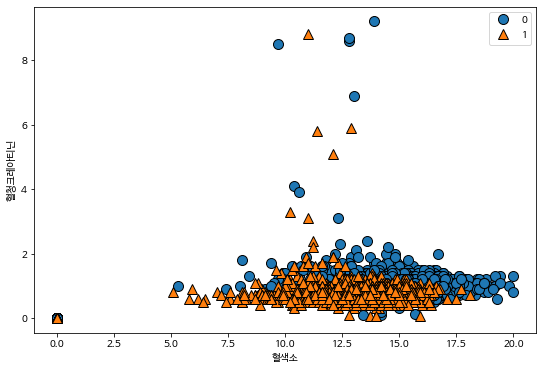

In [74]:
mglearn.discrete_scatter(health_sample['혈색소'], health_sample['혈청크레아티닌'], health_sample['성별코드'])
plt.xlabel("혈색소")
plt.ylabel("혈청크레아티닌")
plt.legend()
plt.show()

먼저 성별에 따라 차이가 날 수 있는 변수를 찾기 위해 여러 변수들을 넣어 그래프를 그려보았다. 0이 남자, 1이 여자를 의미하는데, 그래프에서 볼 수 있듯이 거의 공통적으로 모여있는 모습이지만 남자가 여자에 비해 혈색소가 더 높은 것을 확인할 수 있다. 

다음은 본격적으로 분류모델을 만들기 위해, 의사결정나무와 앙상블 모델을 이용하였다. 정확도의 차이에 따라 무엇이 더 최적의 모델일지 확인해볼 계획이다. 

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


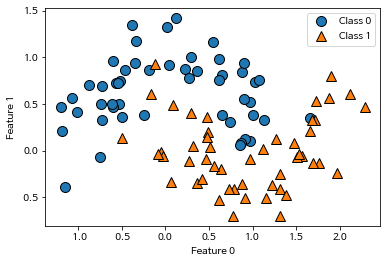

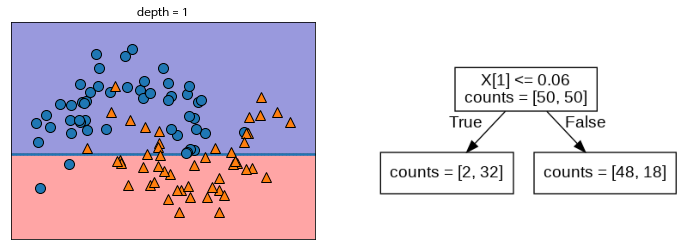

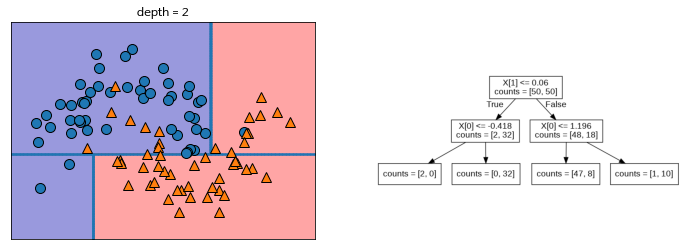

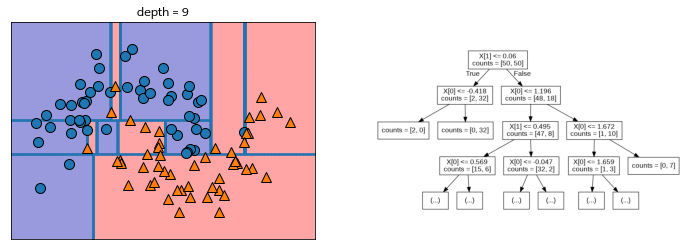

In [37]:
# 의사결정나무 만드는 과정 
mglearn.plots.plot_tree_progressive()

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X = health_sample.iloc[:, 1:]  # 30개 변수 
#y = health_sample.iloc[:, 0]   # target 변수 diagnosis  
y = health_sample['성별코드']



# 데이터셋을 학습(train)과 테스트(test) 세트로 분할
# random_state : random 으로 분할시 사용되는 난수 seed 숫자
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify=y, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

tree = DecisionTreeClassifier(random_state=0)  
tree.fit(X_train, y_train)
print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 0.997
시험용 데이터 정확도: 0.814


In [79]:
# 의사결정나무의 깊이를 4로 제한하면 시험용 데이터에 대한 성능이 향상됨 (과적합을 줄임)
# 과적합(overfitting): 학습용 데이터에 대해서만 성능이 좋고 새로운 데이터에 적용했을 경우에는 성능이 좋지 않은 경우
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 0.866
시험용 데이터 정확도: 0.850


의사결정나무에서는 학습용 데이터와 시험용 데이터의 정확도가 각각, 0.866과 0.850 인 것을 확인할 수 있다. 

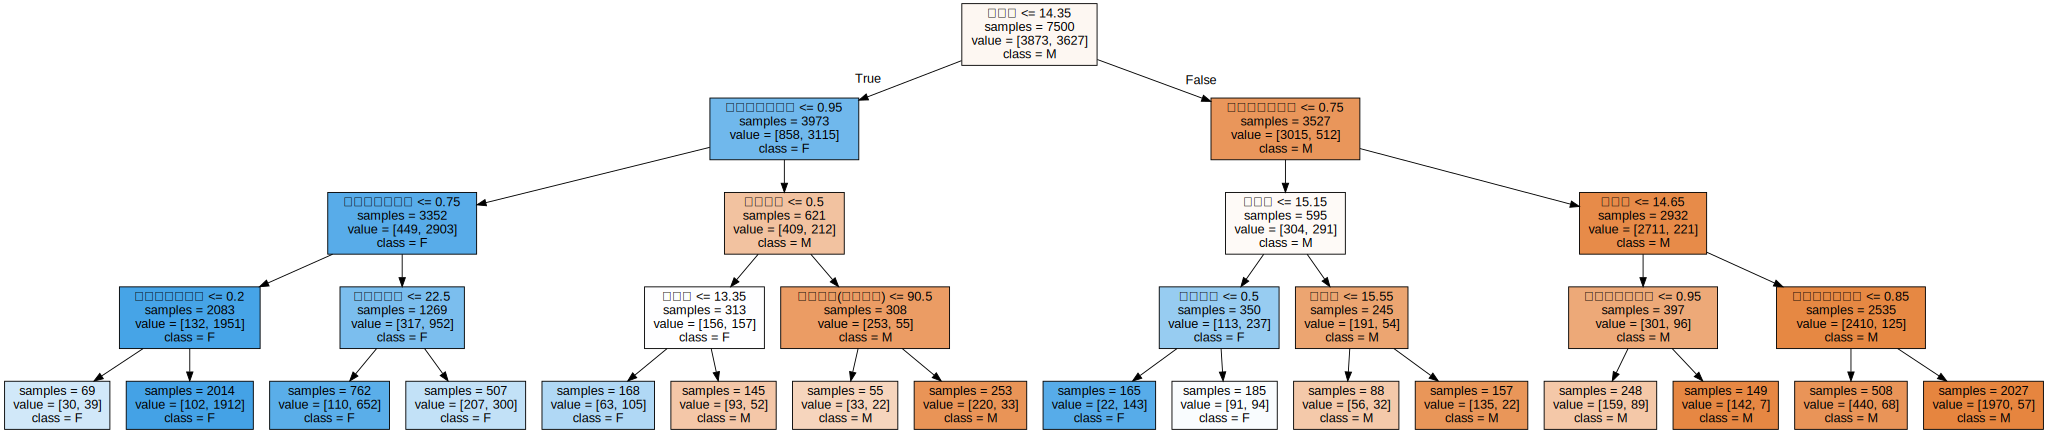

In [81]:
#graphviz 라이브러리를 이용하여 의사결정나무 그리기 
from sklearn.tree import export_graphviz
import graphviz

# filled = True: 색상의 진하기로 클래스를 나타냄, impurity: 불순도 계산값 보여주기 옵션
export_graphviz(tree, out_file="tree.dot", class_names=[ "M", "F"],
                feature_names=health_sample.columns[1:], impurity=False, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

의사결정나무의 그래프를 보면, 혈청크레아티닌과 혈색소를 이용해 M과 F를 우선적으로 분류함을 확인할 수 있다. 아래 변수의 중요성 분석 결과를 봐도 똑같은 변수들이 성별코드를 확인하는데에 가장 중요함을 알 수 있다.

In [43]:
result = tree.feature_importances_
print("변수의 중요도:\n", result)

변수의 중요도:
 [0.         0.         0.0028663  0.         0.         0.
 0.         0.71045652 0.         0.24422929 0.         0.
 0.01851528 0.02393262 0.        ]


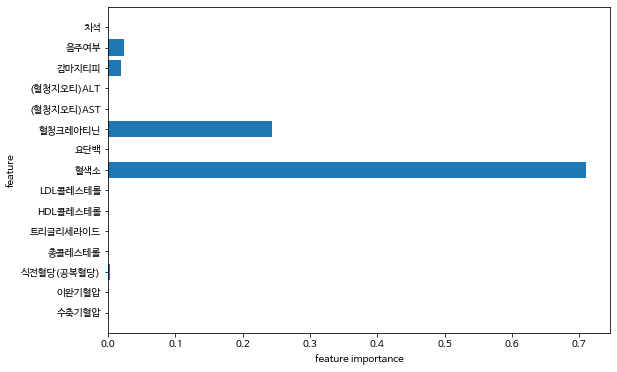

In [44]:
import numpy as np

def plot_feature_importances_wisc(model):
    plt.rcParams["figure.figsize"] = (9,6)
    n_features = len(health_sample.columns[1:])  # 30개 
    plt.barh(np.arange(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), health_sample.columns[1:])   # 30개의 눈금을 표시하고 눈금 레이블을 변수 이름으로 지정
    plt.xlabel("feature importance")
    plt.ylabel("feature")
    plt.ylim(-1, n_features) #Y 축 범위 지정 (-1 ~ 30)

plot_feature_importances_wisc(tree)

In [46]:
res = pd.DataFrame(result)
res["name"] = health_sample.columns[1:]
display(res.info())

# perimeter_worst의 비중이 가장 큼, 루트 노드에서 이 값부터 사용 
display(res.sort_values(by='name'))  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       15 non-null     float64
 1   name    15 non-null     object 
dtypes: float64(1), object(1)
memory usage: 368.0+ bytes


None

,0,name
11,0.000000,(혈청지오티)ALT
10,0.000000,(혈청지오티)AST
5,0.000000,HDL콜레스테롤
6,0.000000,LDL콜레스테롤
12,0.018515,감마지티피
0,0.000000,수축기혈압
2,0.002866,식전혈당(공복혈당)
8,0.000000,요단백
13,0.023933,음주여부
1,0.000000,이완기혈압


다음은 이 의사결정나무모델과 비교할 앙상블 모델로 정확도를 비교해볼 예정이다. 

앙상블 모델 

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


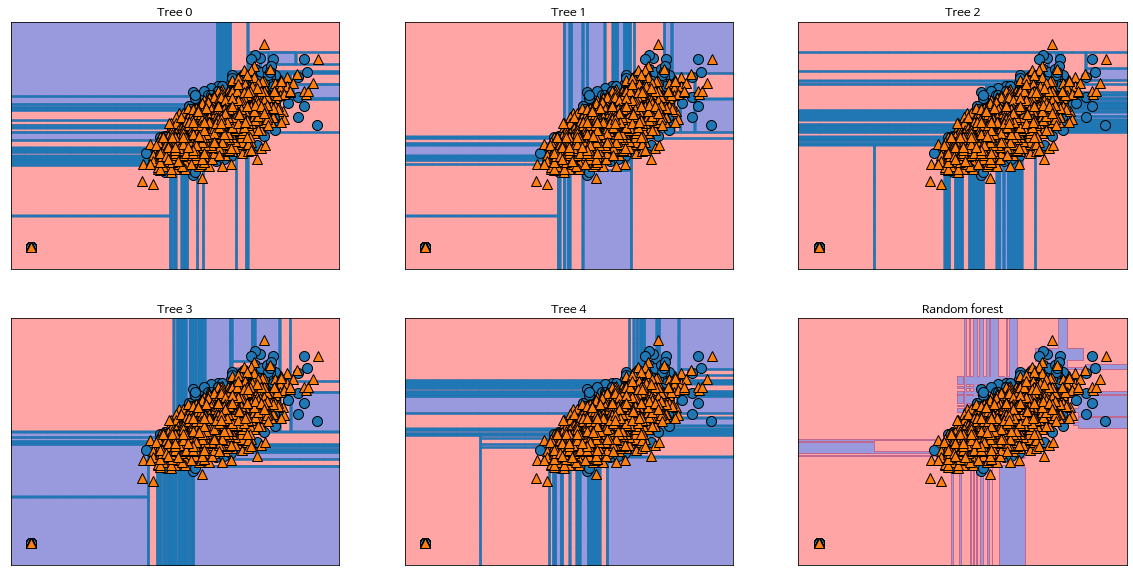

In [56]:
from sklearn.ensemble import RandomForestClassifier

# radius_mean, texture_mean 변수만 이용하여 
# 5개의 나무를 만드는 예 (n_estimators = 5, 실제는 수백개의 트리를 만든다)
forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train.iloc[:, 0:2], y_train)

# 5개 나무 각각의 분류 경계를 그림 (서로 모양이 많이 다르다)
# 2차원으로 나무의 결과를 보여주기 위한 코드로 mglearn의 함수들을 이용 - 여기서는 설명 생략
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X.iloc[:, 0:2].values, y, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X.iloc[:, 0:2].values, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("Random forest")
mglearn.discrete_scatter(X.iloc[:, 0], X.iloc[:, 1], y)
plt.show()

In [57]:
# 30개 변수를 모두 이용하여 100개의 나무 생성 (정확도가 높아짐)

forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("학습용 데이터 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))

학습용 데이터 세트 정확도: 0.997
시험용 데이터 세트 정확도: 0.870


의사결정나무에서 확인했던 정확도 보다 더욱 높아진 것을 확인할 수 있다. 먼저 학습용 데이터의 정확도는 의사결정나무에서는 0.866, 앙상블 모델에서는 0.997. 거의 1에 가까운 높은 정확도를 보인다. 다음으로 시험용 데이터 정확도에서는 의사결정나무 - 0.850, 앙상블 모델 - 0.870 으로 약간 더 높은 정확도를 보인다. 

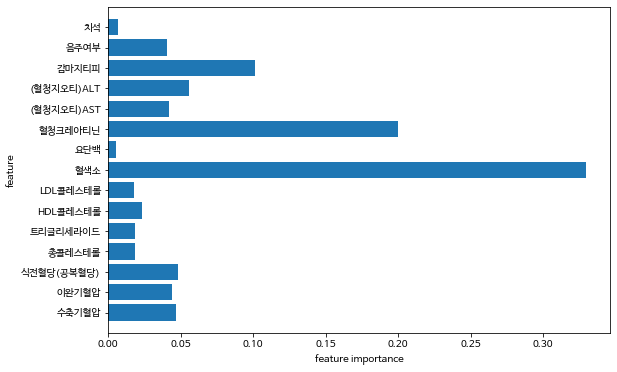

In [60]:
# 단일 의사결정나무의 경우보다 많은 변수(feature)들이 사용됨
plot_feature_importances_wisc(forest)

의사결정나무와 달리 여러가지 변수들이 가지고 있는 중요도를 더 자세히 볼 수 있게 되었다. 의사결정나무에서 언급되었던 혈색소와 혈청크레아티닌을 제외하고도 감마티지피 또한 중요 변수로 확인되었다.

그다음, 랜덤 포레스트와 단일 의사결정나무를 비교해보기 위해 라인 차트를 그려보았다. 

In [61]:
from sklearn.model_selection import cross_val_score

# 교차 검증을 10번 수행하여 10번의 교차 검증 평균 정확도를 비교 (10-fold cross validation)
# default cv=5

dt_scores = cross_val_score(tree, X_train, y_train, cv=10, scoring='accuracy')  
rf_scores = cross_val_score(forest, X_train, y_train, cv=10, scoring='accuracy')

print("Accuracy")
print("Decision tree: ", dt_scores) 
print("Random forest: ", rf_scores) 

print("Accuracy mean")
print("Decision tree :{:.3f}".format(dt_scores.mean())) 
print("Random forest :{:.3f}".format(rf_scores.mean())) 

Accuracy
Decision tree:  [0.812      0.82       0.81466667 0.78666667 0.81733333 0.80133333
 0.81066667 0.816      0.832      0.80933333]
Random forest:  [0.89333333 0.89066667 0.87466667 0.88533333 0.88533333 0.86666667
 0.872      0.872      0.89466667 0.86666667]
Accuracy mean
Decision tree :0.812
Random forest :0.880


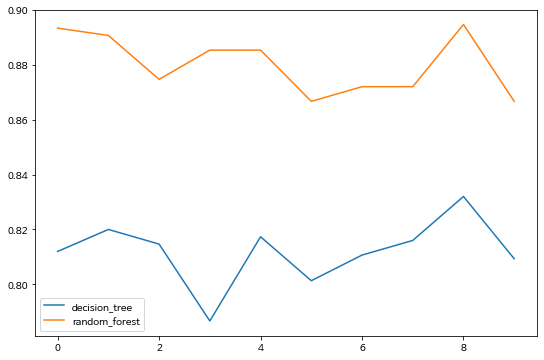

In [62]:
cv_list = [    
            ['decision_tree',dt_scores],
            ['random_forest',rf_scores],
          ]
df = pd.DataFrame.from_dict(dict(cv_list))
df.plot()

앞에서 말했다시피 random_forest 즉, 앙상블 모델에서 훨씬 더 높은 정확도를 보인다. 

또한,앙상블 모델에서 랜덤한 방식으로 트리의 앙상블을 구하는 것이 아니라 이전의 트리의 성능을 단계적으로 보완하여 오차를 줄이는 방식으로 나무를 생성하는 그래디언트 부스팅을 진행하였다. 

In [64]:
from sklearn.model_selection import GridSearchCV

# 파라미터를 dictionary 형태로 설정
parameters = {'max_depth':[1,2,3], 'learning_rate':[0.1,0.08, 0.06, 0.04, 0.02]}

In [66]:
from sklearn.ensemble import GradientBoostingClassifier
# 기본값은 max_depth= 3, n_estimators=100, learning_rate = 0.1

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(random_state=0)

In [67]:
print("학습용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

학습용 데이터 세트 정확도: 0.898
시험용 데이터 세트 정확도: 0.870


여기서 정확도는 랜덤 포레스트보다 학습용 데이터의 정확도가 0.997에서 0.898로 조금 더 낮은 것을 볼 수 있다.

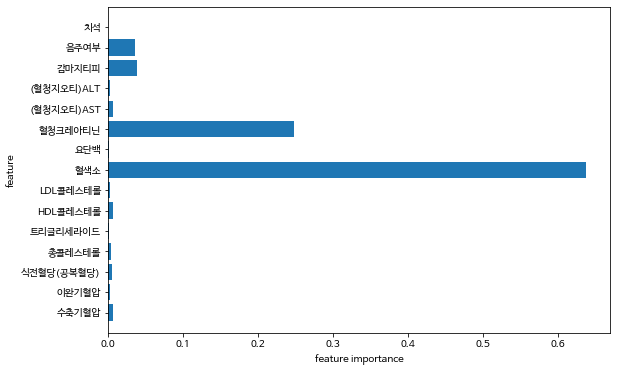

In [68]:
plot_feature_importances_wisc(gbrt)

In [69]:
#나무 깊이 제한
gbrt = GradientBoostingClassifier(random_state=0, max_depth=2)
gbrt.fit(X_train, y_train)

print("학습 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

학습 데이터 세트 정확도: 0.889
시험용 데이터 세트 정확도: 0.869


In [70]:
#학습률 감소
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("학습 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

학습 데이터 세트 정확도: 0.871
시험용 데이터 세트 정확도: 0.859


마지막으로 최적의 모델을 확정짓기 위해 분류모델평가(교차 검증)을 사용하였다.

In [71]:
# 교차 검증을 10번 수행하여 10번의 교차 검증 평균 정확도를 비교 (10-fold cross validation)
# default cv=5

dt_scores = cross_val_score(tree, X_train, y_train, cv=10, scoring='accuracy')  
rf_scores = cross_val_score(forest, X_train, y_train, cv=10, scoring='accuracy')
gbrt_scores = cross_val_score(gbrt, X_train, y_train, cv=10, scoring='accuracy')

print("Accuracy")
print("Decision tree: ", dt_scores) 
print("Random forest: ", rf_scores) 
print("Gradient boosting: ", gbrt_scores) 

print("Accuracy mean")
print("Decision tree :{:.3f}".format(dt_scores.mean())) 
print("Random forest :{:.3f}".format(rf_scores.mean())) 
print("Gradient boosting :{:.3f}".format(gbrt_scores.mean()))

Accuracy
Decision tree:  [0.812      0.82       0.81466667 0.78666667 0.81733333 0.80133333
 0.81066667 0.816      0.832      0.80933333]
Random forest:  [0.89333333 0.89066667 0.87466667 0.88533333 0.88533333 0.86666667
 0.872      0.872      0.89466667 0.86666667]
Gradient boosting:  [0.87733333 0.87333333 0.856      0.86933333 0.85066667 0.856
 0.852      0.868      0.88266667 0.86933333]
Accuracy mean
Decision tree :0.812
Random forest :0.880
Gradient boosting :0.865


In [72]:
# 교차 검증 상세 옵션 지정

# KFold :기본값 n_splits=5, shuffle=None (데이터를 임의로 섞지 않음) 
# LeaveOneOut :데이터 1개를 검증에 이용 
# ShuffleSplit :임의 분할, 전체 데이터를 모두 사용하지 않을 수도 있음
# GroupKFold :그룹을 지정해서 같은 그룹의 데이터는 학습용 또는 검증용으로 동일하게 분할
# StratifiedKFold :각 fold마다 클래스의 분포가 동일하도록 분할 (예. 악성:양성) 
# RepeatedStratifiedKFold: 교차검증을 반복, 기본값 n_repeats =10

from sklearn.model_selection import StratifiedKFold
kf = StratifiedKFold(n_splits=10)
#from sklearn.model_selection import RepeatedStratifiedKFold
#kf = RepeatedStratifiedKFold(n_splits=10)

print(kf)

dt_scores = cross_val_score(tree, X_train, y_train, cv=kf, scoring='accuracy')  
rf_scores = cross_val_score(forest, X_train, y_train, cv=kf, scoring='accuracy')
gbrt_scores = cross_val_score(gbrt, X_train, y_train, cv=kf, scoring='accuracy')

print("Accuracy mean -- StratifiedKFold 이용")
print("Decision tree :{:.3f}".format(dt_scores.mean())) 
print("Random forest :{:.3f}".format(rf_scores.mean())) 
print("Gradient boosting :{:.3f}".format(gbrt_scores.mean()))

StratifiedKFold(n_splits=10, random_state=None, shuffle=False)
Accuracy mean -- StratifiedKFold 이용
Decision tree :0.812
Random forest :0.880
Gradient boosting :0.865


최종 결정 및 인사이트 : 교차 검증에서 볼 수 있듯이, 제일 정확도가 큰 것은 Random forest의 0.880, 그 다음은 Gradient boosting의 0.865. 제일 마지막으로 Decision tree: 0.812로 제일 낮았다. 전체적으로 앙상블 모델이 제일 최적화된 것을 볼 수 있으나 결정적으로 랜덤 포레스트가 성별코드를 분류할 최적의 모델인 것이다. 랜덤 포레스트는 또한 혈색소, 혈청크레아티닌 이외에도 감마지티피,ALT 등이 성별을 분류하는데에 중요하다는 인사이트를 얻을 수 있었다.  